In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
gk = pd.read_csv('gk.df.csv')
upah = pd.read_csv('upah.df.csv')
pengeluaran = pd.read_csv('peng.df.csv')
ump = pd.read_csv('ump.df.csv')

In [6]:
gk.set_index(['provinsi', 'jenis', 'daerah', 'tahun', 'periode'], inplace=True)
upah.set_index(['provinsi', 'tahun'], inplace=True)
pengeluaran.set_index(['provinsi', 'daerah', 'jenis', 'tahun'], inplace=True)
ump.set_index(['provinsi', 'tahun'], inplace=True)

In [15]:
# Check data types of the merging columns in each DataFrame
gk_reset = gk.reset_index()
upah_reset = upah.reset_index()
pengeluaran_reset = pengeluaran.reset_index()
ump_reset = ump.reset_index()

print(gk_reset[['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk']].dtypes)
print(upah.reset_index()[['provinsi', 'tahun']].dtypes)
print(pengeluaran_reset[['provinsi', 'daerah', 'tahun', 'jenis', 'peng']].dtypes)
print(ump_reset[['provinsi', 'tahun', 'ump']].dtypes)

provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object
provinsi    object
tahun        int64
dtype: object
provinsi     object
daerah       object
tahun         int64
jenis        object
peng        float64
dtype: object
provinsi     object
tahun         int64
ump         float64
dtype: object


In [16]:
# Ensure 'tahun' is of type int64 in all DataFrames
gk_reset['tahun'] = gk_reset['tahun'].astype(int)  # Convert 'tahun' to int64
upah_reset = upah.reset_index()  # Reset index of upah and store in upah_reset
upah_reset['tahun'] = upah_reset['tahun'].astype(int)  # Convert 'tahun' to int64 in upah_reset
pengeluaran_reset['tahun'] = pengeluaran_reset['tahun'].astype(int)  # Convert 'tahun' to int64 in pengeluaran_reset
ump_reset['tahun'] = ump_reset['tahun'].astype(int)  # Convert 'tahun' to int64 in ump_reset

In [17]:
# Reset indices of all DataFrames before merging
gk_reset = gk_reset.reset_index(drop=True)
upah_reset = upah_reset.reset_index(drop=True)
pengeluaran_reset = pengeluaran_reset.reset_index(drop=True)
ump_reset = ump_reset.reset_index(drop=True)

# Perform the merge operation
merged_data = gk_reset.merge(upah_reset, on=['provinsi', 'tahun'], how='left') \
                      .merge(pengeluaran_reset, on=['provinsi', 'daerah', 'tahun', 'jenis'], how='left') \
                      .merge(ump_reset, on=['provinsi', 'tahun'], how='left')

In [18]:
print(merged_data.shape)
print(merged_data.columns)

(5460, 9)
Index(['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk', 'upah', 'peng',
       'ump'],
      dtype='object')


In [19]:
print(merged_data.isnull().sum())


provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
upah        420
peng         64
ump          12
dtype: int64


In [20]:
for df in [gk_reset, upah_reset, pengeluaran_reset, ump_reset]:
    print(f"Tahun: {df['tahun'].min()} - {df['tahun'].max()}")

Tahun: 2013 - 2022
Tahun: 2015 - 2022
Tahun: 2007 - 2022
Tahun: 2002 - 2022


In [ ]:
for df in [gk_reset, upah_reset, pengeluaran_reset, ump_reset]:
    print(f"Provinsi: {df['provinsi'].nunique()}")
    print(df['provinsi'].unique())

Provinsi: 35
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']
Provinsi: 35
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORO

In [ ]:
print(merged_data[merged_data['upah'].isna()][['provinsi', 'tahun']].value_counts())

provinsi             tahun
ACEH                 2013     6
NUSA TENGGARA BARAT  2013     6
PAPUA BARAT          2013     6
PAPUA                2014     6
                     2013     6
                             ..
KALIMANTAN TENGAH    2014     6
KALIMANTAN TIMUR     2013     6
                     2014     6
KALIMANTAN UTARA     2013     6
SUMATERA UTARA       2014     6
Name: count, Length: 70, dtype: int64


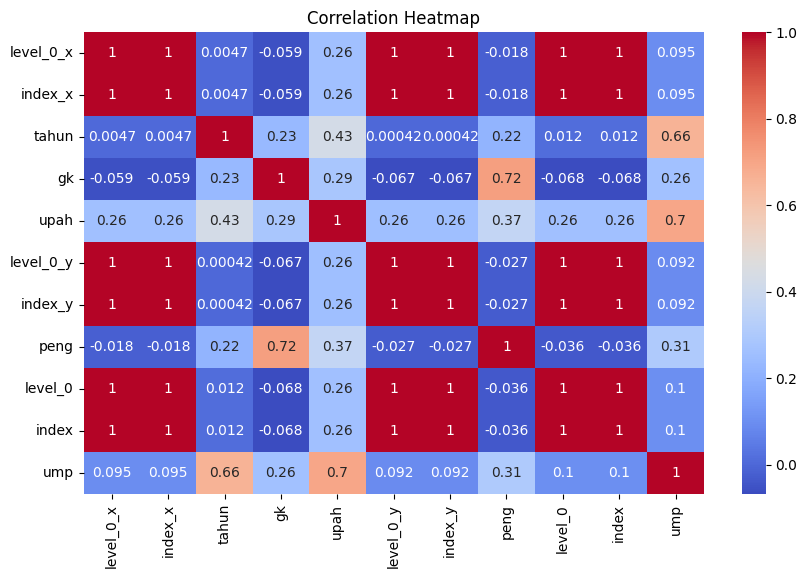

In [ ]:


plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numerical_features = ['tahun', 'periode', 'gk', 'jenis', 'peng', 'ump']

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame, replace this with your actual DataFrame
data = pd.read_csv('gk.df.csv')
data1 = pd.read_csv ('upah.df.csv')
data2 = pd.read_csv('peng.df.csv')
data3 = pd.read_csv('ump.df.csv')

numerical_features = ['tahun', 'gk']
numerical_features1 = ['tahun', 'upah']
numerical_features2 = ['tahun', 'peng']
numerical_features3 = ['tahun', 'ump']



In [ ]:
# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
data[numerical_features] = imputer.fit_transform(data[numerical_features])
data1[numerical_features1] = imputer.fit_transform(data1[numerical_features1])
data2[numerical_features2] = imputer.fit_transform(data2[numerical_features2])
data3[numerical_features3] = imputer.fit_transform(data3[numerical_features3])

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])
data_scaled1 = scaler.fit_transform(data1[numerical_features1])
data_scaled2 = scaler.fit_transform(data2[numerical_features2])
data_scaled3 = scaler.fit_transform(data3[numerical_features3])

In [ ]:
kmeans = KMeans(n_clusters=4)
data['cluster'] = kmeans.fit_predict(data[numerical_features])
data1['cluster'] = kmeans.fit_predict(data1[numerical_features1])
data2['cluster'] = kmeans.fit_predict(data2[numerical_features2])
data3['cluster'] = kmeans.fit_predict(data3[numerical_features3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print("Data:")
print(data.groupby('cluster').describe())

Data:
          tahun                                                         \
          count         mean       std     min     25%     50%     75%   
cluster                                                                  
0        1421.0  2018.824771  2.328841  2013.0  2017.0  2019.0  2021.0   
1        1910.0  2016.820942  2.522062  2013.0  2015.0  2017.0  2019.0   
2        1636.0  2018.363081  2.295898  2013.0  2016.0  2018.0  2020.0   
3         493.0  2020.263692  1.748240  2015.0  2019.0  2021.0  2022.0   

                     gk                                                   \
            max   count           mean           std       min       25%   
cluster                                                                    
0        2022.0  1421.0  426019.083040  41855.668966  362579.0  390150.0   
1        2022.0  1910.0  298610.944983  39210.322355  207345.0  271529.0   
2        2022.0  1636.0  115638.512836  34538.494070   48561.0   89978.0   
3        2022.0   4

In [ ]:
print("\nData1:")
print(data1.groupby('cluster').describe())


Data1:
         tahun                                                          \
         count         mean       std     min     25%     50%      75%   
cluster                                                                  
0         62.0  2019.629032  2.026334  2015.0  2018.0  2020.0  2021.00   
1         81.0  2016.975309  1.981005  2015.0  2015.0  2016.0  2018.00   
2         33.0  2019.666667  1.814295  2016.0  2019.0  2020.0  2021.00   
3        104.0  2018.644231  2.171833  2015.0  2017.0  2019.0  2020.25   

                  upah                                                        \
            max  count          mean          std      min      25%      50%   
cluster                                                                        
0        2022.0   62.0  19334.758065  1372.779037  17489.0  18137.0  19058.0   
1        2022.0   81.0  12204.592593  1205.693149   8525.0  11434.0  12560.0   
2        2022.0   33.0  25522.454545  2786.031655  22912.0  23444.0  2483

In [ ]:
print("\nData2:")
print(data2.groupby('cluster').describe())


Data2:
          tahun                                                         \
          count         mean       std     min     25%     50%     75%   
cluster                                                                  
0        1757.0  2016.228230  3.948954  2007.0  2013.0  2017.0  2020.0   
1         341.0  2019.222874  2.364605  2011.0  2018.0  2020.0  2021.0   
2        1762.0  2011.966515  3.617660  2007.0  2009.0  2012.0  2014.0   
3         760.0  2017.575000  3.200322  2007.0  2015.0  2018.0  2020.0   

                   peng                                                      \
            max   count          mean            std        min         25%   
cluster                                                                       
0        2022.0  1757.0  5.864838e+05   87107.418237   442900.0   512252.00   
1        2022.0   341.0  1.460530e+06  224810.777250  1206425.0  1301753.00   
2        2022.0  1762.0  3.002309e+05   92140.817356    59216.0   230497.25   

In [ ]:
print("\nData3:")
print(data3.groupby('cluster').describe())


Data3:
         tahun                                                                 \
         count         mean       std     min     25%     50%     75%     max   
cluster                                                                         
0        306.0  2006.500000  3.040977  2002.0  2004.0  2006.0  2009.0  2016.0   
1        158.0  2017.898734  2.346402  2013.0  2016.0  2018.0  2020.0  2022.0   
2         88.0  2020.159091  1.574848  2015.0  2019.0  2020.0  2021.0  2022.0   
3        183.0  2012.180328  3.654779  2002.0  2011.0  2013.0  2014.0  2020.0   

           ump                                                                 \
         count          mean            std        min         25%        50%   
cluster                                                                         
0        306.0  6.148737e+05  190633.168080   245000.0   447715.50   612000.0   
1        158.0  2.142899e+06  249677.422229  1737412.0  1907099.25  2155626.5   
2         88.0  2.9

In [ ]:
print(.columns)

NameError: name 'data' is not defined

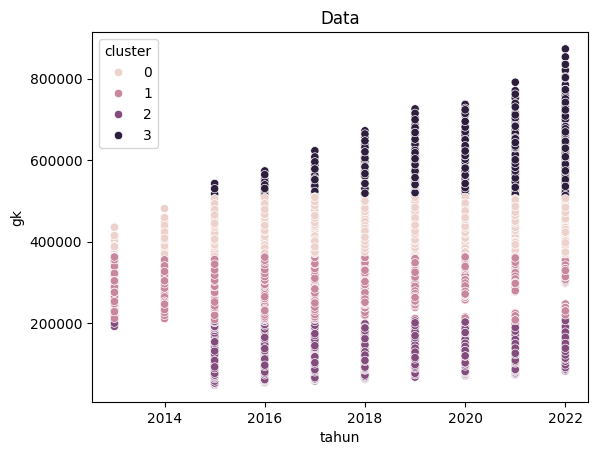

In [ ]:
sns.scatterplot(x='tahun', y='gk', hue='cluster', data=data)
plt.title('Data')
plt.show()

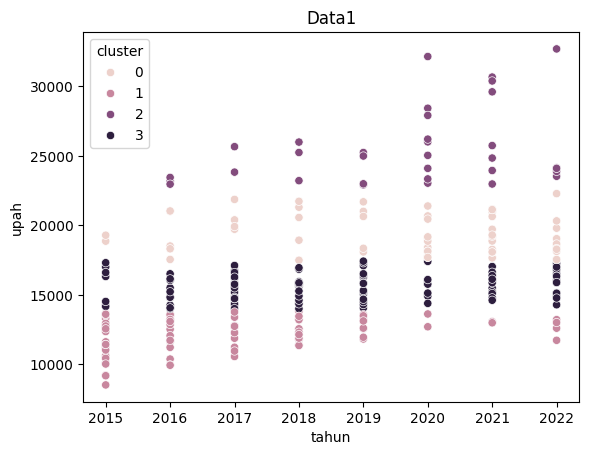

In [ ]:
sns.scatterplot(x='tahun', y='upah', hue='cluster', data=data1)
plt.title('Data1')
plt.show()

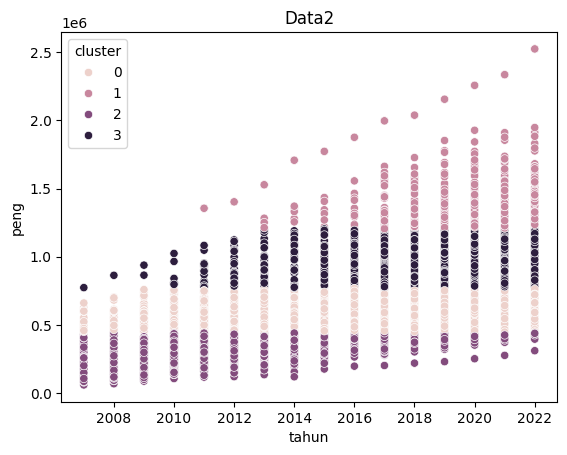

In [ ]:
sns.scatterplot(x='tahun', y='peng', hue='cluster', data=data2)
plt.title('Data2')
plt.show()

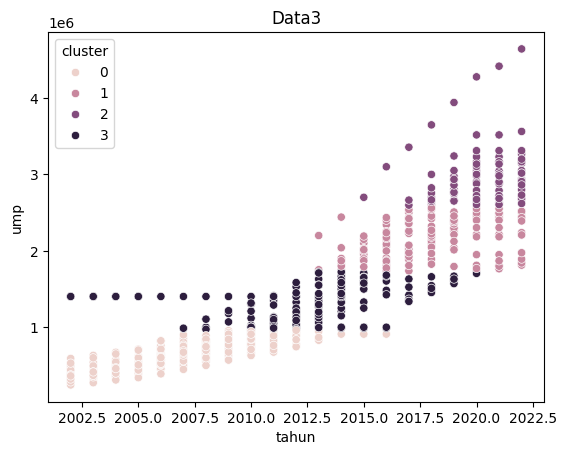

In [ ]:
sns.scatterplot(x='tahun', y='ump', hue='cluster', data=data3)
plt.title('Data3')
plt.show()